In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid', rc={'ytick.left' : True})
pal = sns.color_palette(palette='icefire')
primary = pal[1]
secondary = pal[5]
highlight = pal[0]

In [3]:
def normalize(df):
    groups = df.groupby(['name', 'size'])
    maxes = groups.transform('max')
    df_norm = df[maxes.columns] / maxes
    df['runtime'] = df_norm['runtime']
    df['energy'] = df_norm['energy']
    return df

In [4]:
def get_title(path, name, size):
    device = path.split('/')[0]
    match device:
        case 'laptop-powersaver': device = 'Laptop (powersaver)'
        case 'laptop-performance': device = 'Laptop (performance)'
        case 'cn125': device = 'Cluster'

    match name:
        case 'matmul': name = f'{size}x{size} matrix multiply'
        case 'transp': name = f'{size}x{size} transpose'
        case 'stencil': name = f'{size}x{size} stencil'
        case 'nbody': name = f'{size} element N-Body'
    
    return f'{device} - {name}'

In [22]:
def twin_plot(df, title):
    fig, ax = plt.subplots()

    sns.barplot(df, x='threads', y='energy', label='Energy', color=primary, ax=ax)
    sns.lineplot(x=range(len(df)), y=df['runtime'], label='Runtime', linewidth=2.5, color=secondary, ax=ax)

    for bar in ax.patches:
        if bar.get_height() == df['energy'].min():
            bar.set_color(highlight)
            break

    ax.set_title(title)
    ax.set_xlabel('#Threads')
    ax.set_ylabel('Normalized value')
    plt.tight_layout()
    plt.show()

In [23]:
def plot(path):
    df = pd.read_csv(path, names=['name', 'size', 'threads', 'runtime', 'runtimesd', 'energy', 'energysd'])
    df = normalize(df)

    for (name, size), group in df.groupby(['name', 'size']):
        title = get_title(path, name, size)
        twin_plot(group, title)

In [24]:
# Not interesting; they all show the same pattern
#plot('laptop-powersaver/nbody.csv')
#plot('laptop-performance/nbody.csv')
#plot('cn125/nbody.csv')

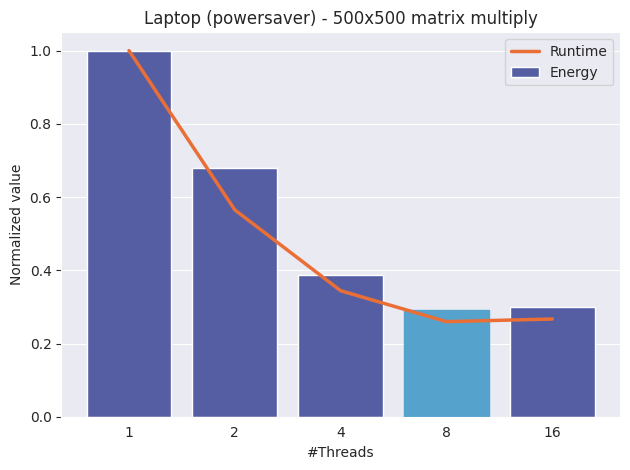

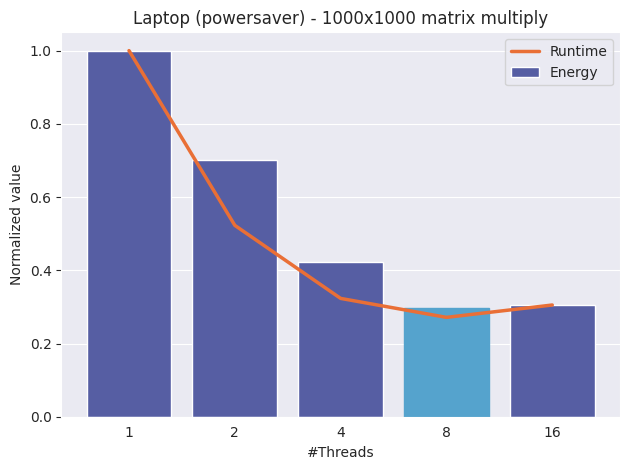

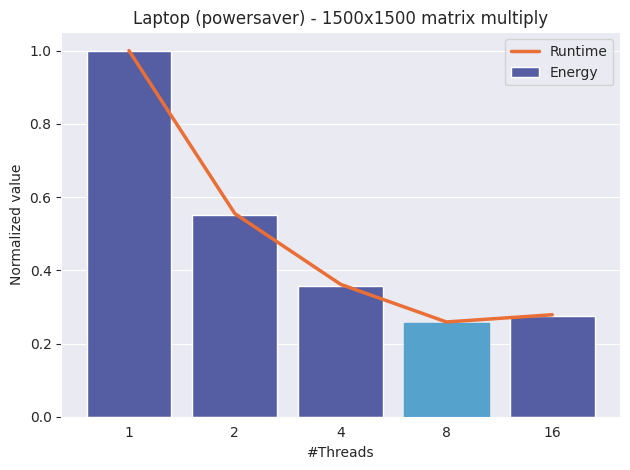

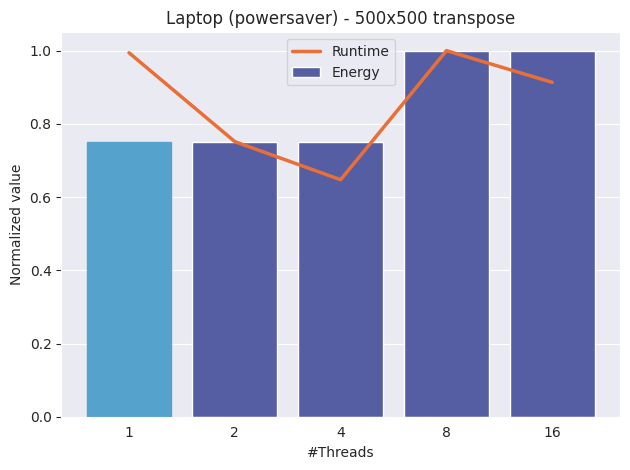

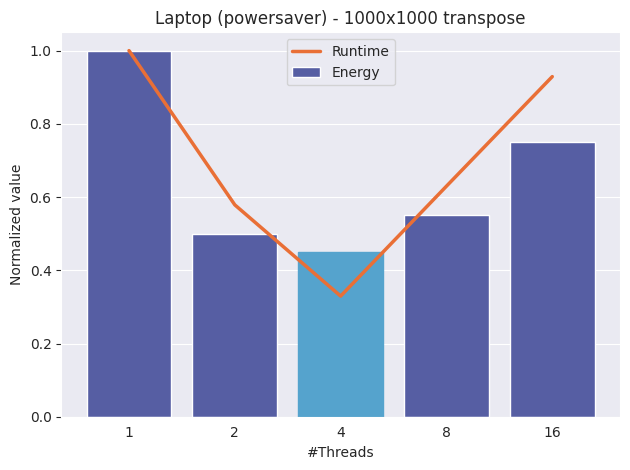

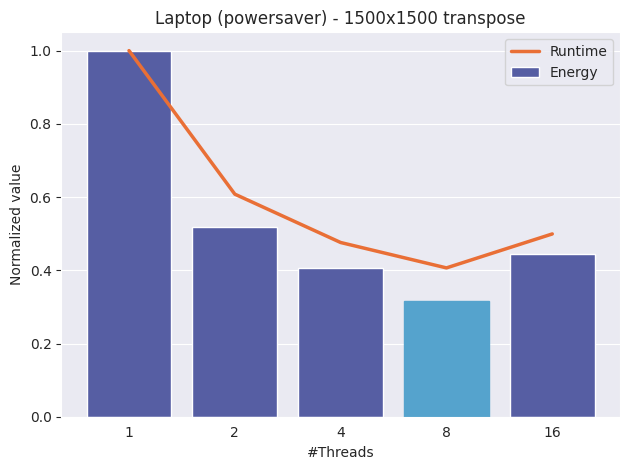

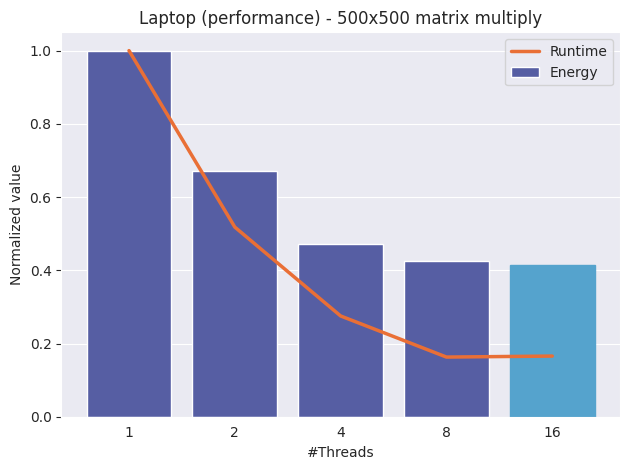

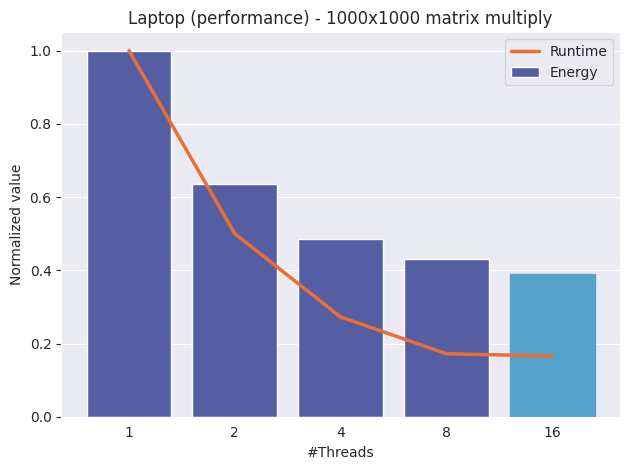

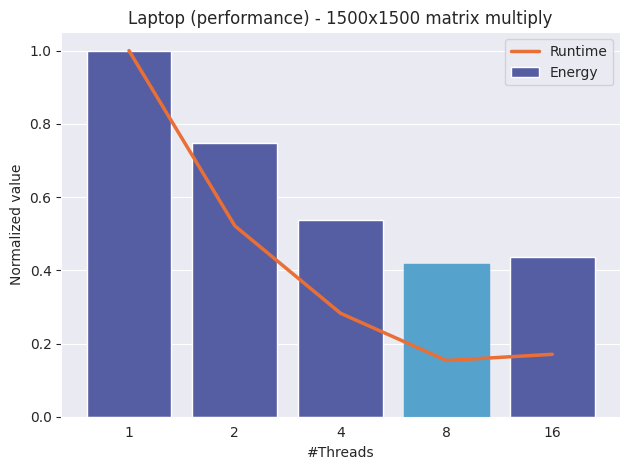

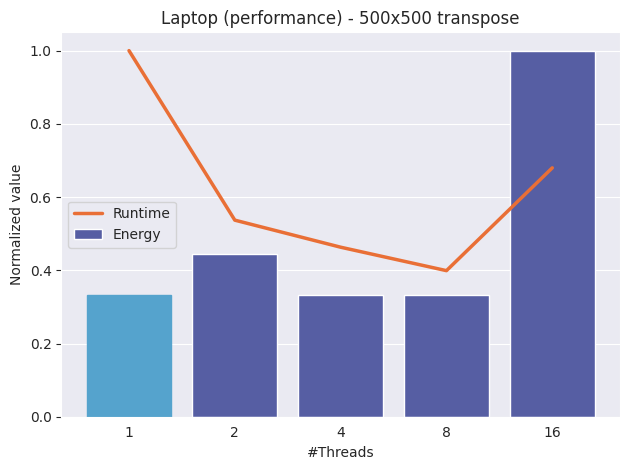

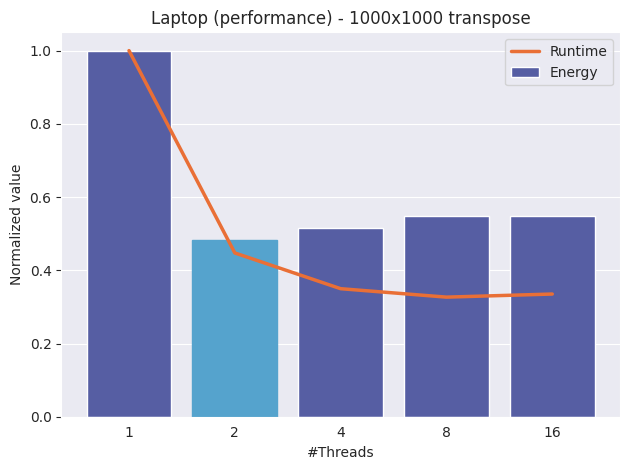

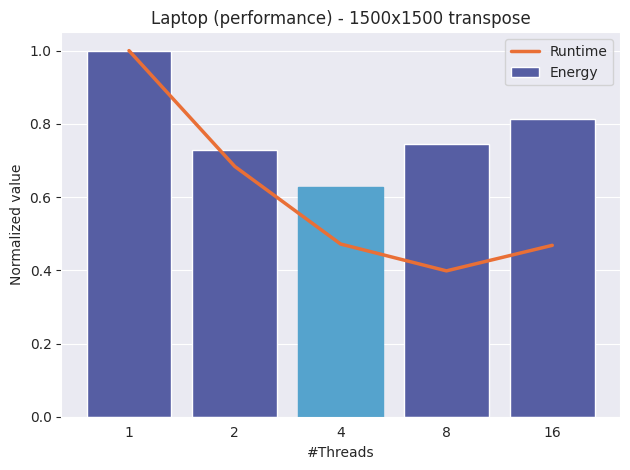

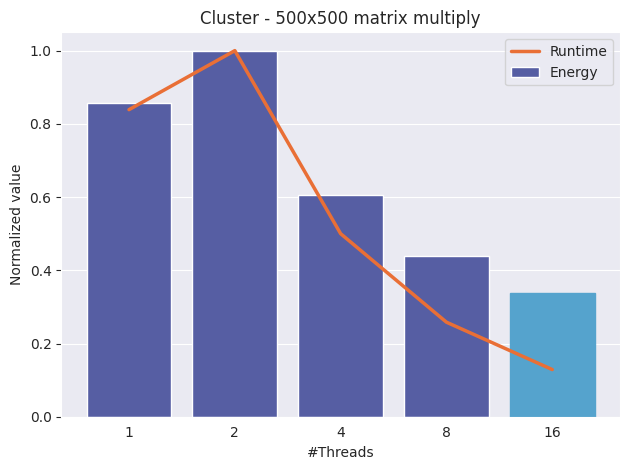

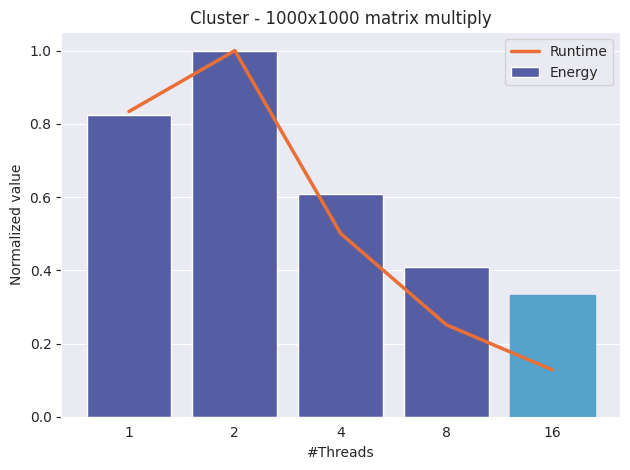

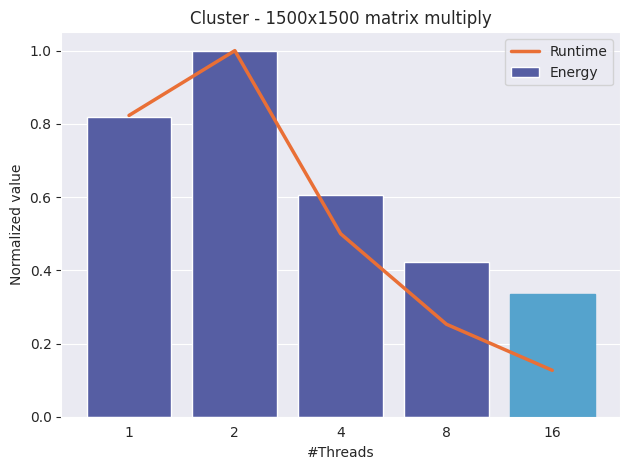

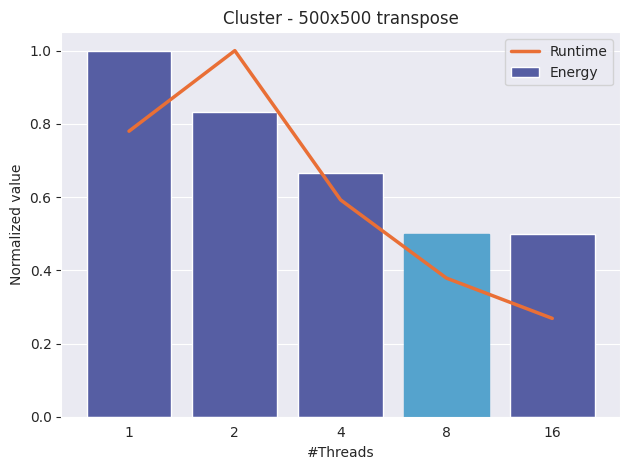

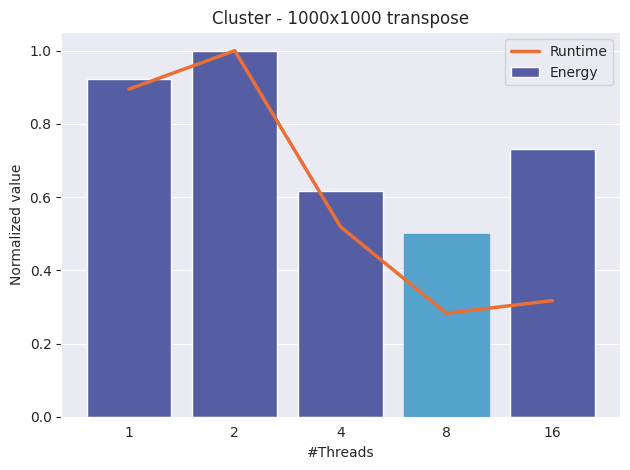

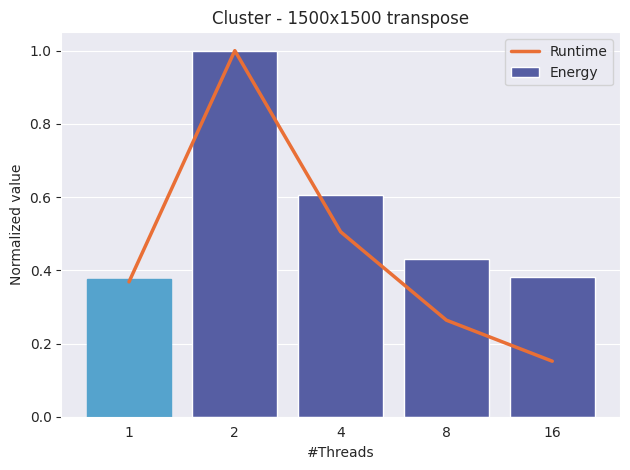

In [25]:
plot('laptop-powersaver/matmul.csv')
plot('laptop-performance/matmul.csv')
plot('cn125/matmul.csv')

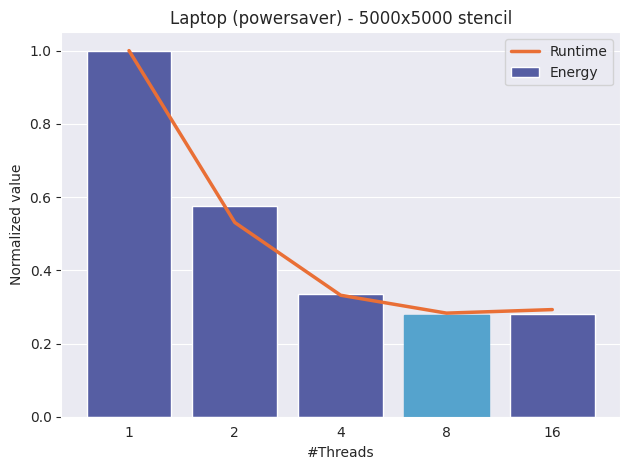

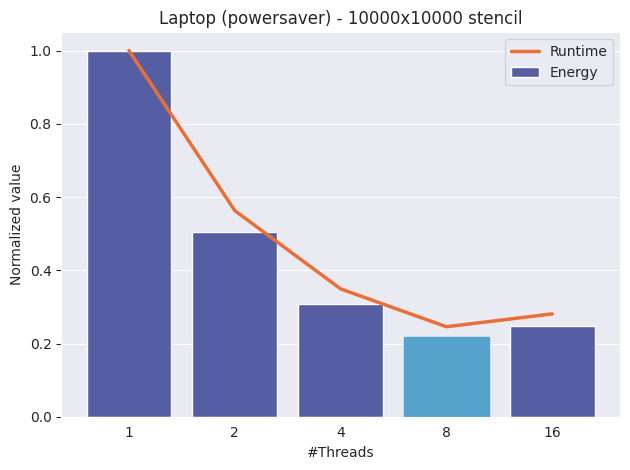

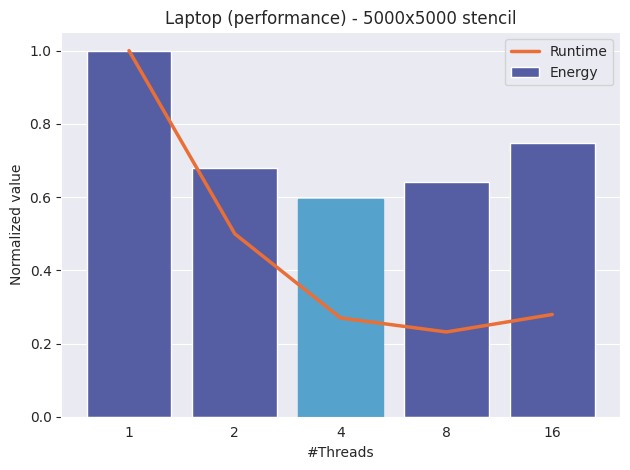

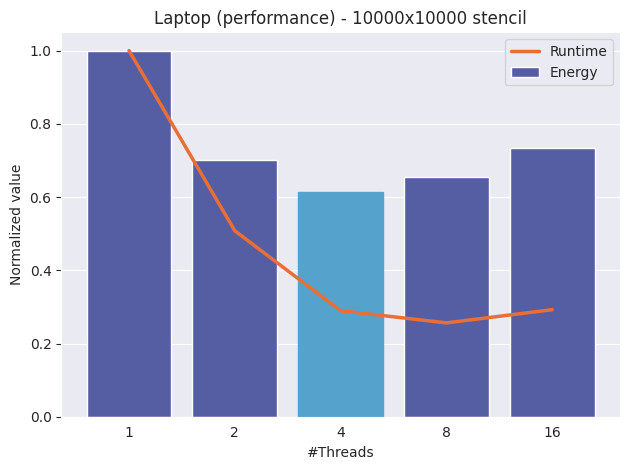

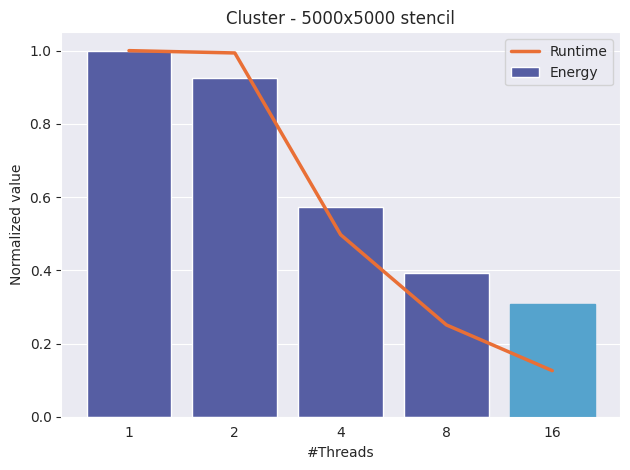

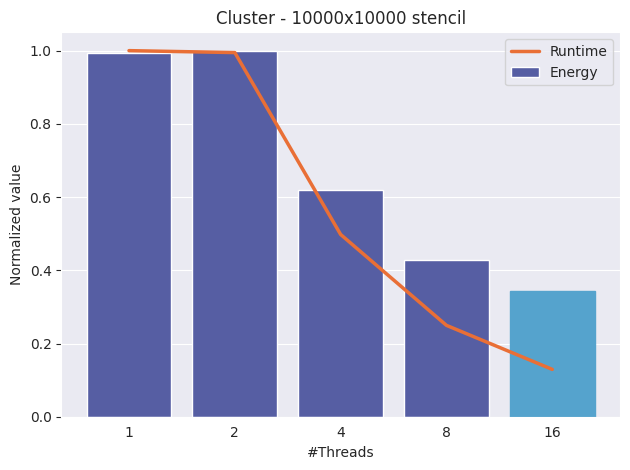

In [26]:
plot('laptop-powersaver/stencil.csv')
plot('laptop-performance/stencil.csv')
plot('cn125/stencil.csv')